# Introduction

Welcome to my Diamond Price Prediction project, an ambitious endeavor leveraging the power of data science and machine learning to unravel and predict diamond prices. Diamonds, with their timeless allure and significant economic value, are priced based on a complex interplay of characteristics. This project seeks to demystify these variables and build a predictive model that accurately forecasts the price of diamonds based on their distinct features.

# Overview

## Objective:

The main objective of this project is to develop a predictive model capable of accurately estimating the price of diamonds. This model is intended not just as an academic exercise but as a practical tool that can be utilized by various stakeholders in the diamond industry, such as retailers, appraisers, and customers, to understand and predict diamond prices effectively.

## Data Set:

The dataset can be obtained on Kaggle: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices/data

* Carat Weight: The most significant factor in diamond pricing, representing the diamond's weight and indirectly its size.

* Cut Quality: This qualitative measure affects a diamond's symmetry and proportions, influencing its brilliance and overall appearance.

* Color Grade: A rating that reflects the absence of color in diamonds, with a scale that ranges from colorless to light yellow or brown.

* Clarity Grade: Indicates the presence or absence of inclusions and blemishes, impacting the diamond's purity and brilliance.

* Additional Features: Measurements like depth percentage, table percentage, and physical dimensions (length x width x depth) also play a role in valuation.

## Methodology:

The project is structured into distinct phases:

1. Data Preprocessing and Cleaning: Ensuring data quality by handling missing values, outliers, and errors, making the dataset ready for analysis.

2. Exploratory Data Analysis (EDA): A deep dive into the dataset using statistical analysis and visualization techniques to identify patterns, correlations, and insights into how different features affect diamond prices.

3. Feature Engineering: Enhancing model performance by creating new features, transforming existing ones, and selecting the most relevant features for predicting diamond prices.

4. Model Building and Selection: Experimenting with various machine learning algorithms, such as linear regression, log linear regression, log log regression, and gradient boosting machines, to identify the model that best fits our data.

5. Model Evaluation and Validation: Rigorously testing the model using metrics like Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and cross-validation to assess its accuracy and robustness.

6. Optimization and Fine-tuning: Adjusting model parameters and employing techniques like grid search to enhance the model's performance.



# Importing packages and reading in dataset

In [53]:
pip install shap

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from math import log
import shap

In [55]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

## Reading in dataset

In [56]:
df = pd.read_csv("Diamonds Prices2022.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# Data Preprocessing & EDA

## Checking for null values

In [57]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Looking at categorical and numerical variables of dataset

In [58]:
#Print a list of categorical variables
numerical_variables = df.select_dtypes(include=['number']).columns.tolist()
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_variables)
print("Numerical Variables:", numerical_variables)

Categorical Variables: ['cut', 'color', 'clarity']
Numerical Variables: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


## Summary statistics

In [59]:
df.describe().round(2)

carat     depth     table     price         x         y         z
count  53943.00  53943.00  53943.00  53943.00  53943.00  53943.00  53943.00
mean       0.80     61.75     57.46   3932.73      5.73      5.73      3.54
std        0.47      1.43      2.23   3989.34      1.12      1.14      0.71
min        0.20     43.00     43.00    326.00      0.00      0.00      0.00
25%        0.40     61.00     56.00    950.00      4.71      4.72      2.91
50%        0.70     61.80     57.00   2401.00      5.70      5.71      3.53
75%        1.04     62.50     59.00   5324.00      6.54      6.54      4.04
max        5.01     79.00     95.00  18823.00     10.74     58.90     31.80

In [60]:
df[df['x'] == 0]

carat        cut color clarity  depth  table  price    x     y    z
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0

In [61]:
df[df['y'] == 0]

carat        cut color clarity  depth  table  price    x    y    z
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.0  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0

In [62]:
df[df['z'] == 0]

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

## Removing rows with x, y, and z = 0

In [63]:
df = df[df['x'] != 0]
df = df[df['y'] != 0]
df = df[df['z'] != 0]
df.describe().round(2)

carat     depth     table     price         x         y         z
count  53923.00  53923.00  53923.00  53923.00  53923.00  53923.00  53923.00
mean       0.80     61.75     57.46   3930.93      5.73      5.73      3.54
std        0.47      1.43      2.23   3987.18      1.12      1.14      0.70
min        0.20     43.00     43.00    326.00      3.73      3.68      1.07
25%        0.40     61.00     56.00    949.00      4.71      4.72      2.91
50%        0.70     61.80     57.00   2401.00      5.70      5.71      3.53
75%        1.04     62.50     59.00   5322.50      6.54      6.54      4.04
max        5.01     79.00     95.00  18823.00     10.74     58.90     31.80

## Visualizing count of values in categorical variables

In [64]:
for feature in categorical_variables:
    count_data = df[feature].value_counts().reset_index()
    count_data.columns = [feature, 'Frequency']

    fig = px.bar(count_data, x=feature, y='Frequency',
                 title=f'Bar Plot for {feature}')

    fig.update_layout(xaxis={'categoryorder':'total descending'},
                      yaxis_title='Frequency',
                      xaxis_title=feature)

    fig.show()

In [65]:
for col in categorical_variables:
    print(f"{col}: {df[col].unique()}")

cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [66]:
for col in categorical_variables:
  print(df[col].value_counts(), '\n')

Ideal        21548
Premium      13782
Very Good    12082
Good          4902
Fair          1609
Name: cut, dtype: int64 

G    11284
E     9799
F     9539
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64 

SI1     13065
VS2     12255
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64 



## Function for scatter plot

In [67]:
def scatter_plot(x, colors, dataframe):
    fig = px.scatter(dataframe, x=x, y='price', color=colors, title=f"{x} vs. price")
    fig.show()

In [68]:
scatter_plot('carat', 'clarity', df)

In [69]:
scatter_plot('carat', 'cut', df)

In [70]:
scatter_plot('carat', 'color', df)

In [71]:
scatter_plot('depth', 'clarity', df)

In [72]:
scatter_plot('depth', 'cut', df)

In [73]:
scatter_plot('depth', 'color', df)

In [74]:
scatter_plot('table', 'color', df)

In [75]:
scatter_plot('z', 'clarity', df)

## Visualizing distribution of numerical features

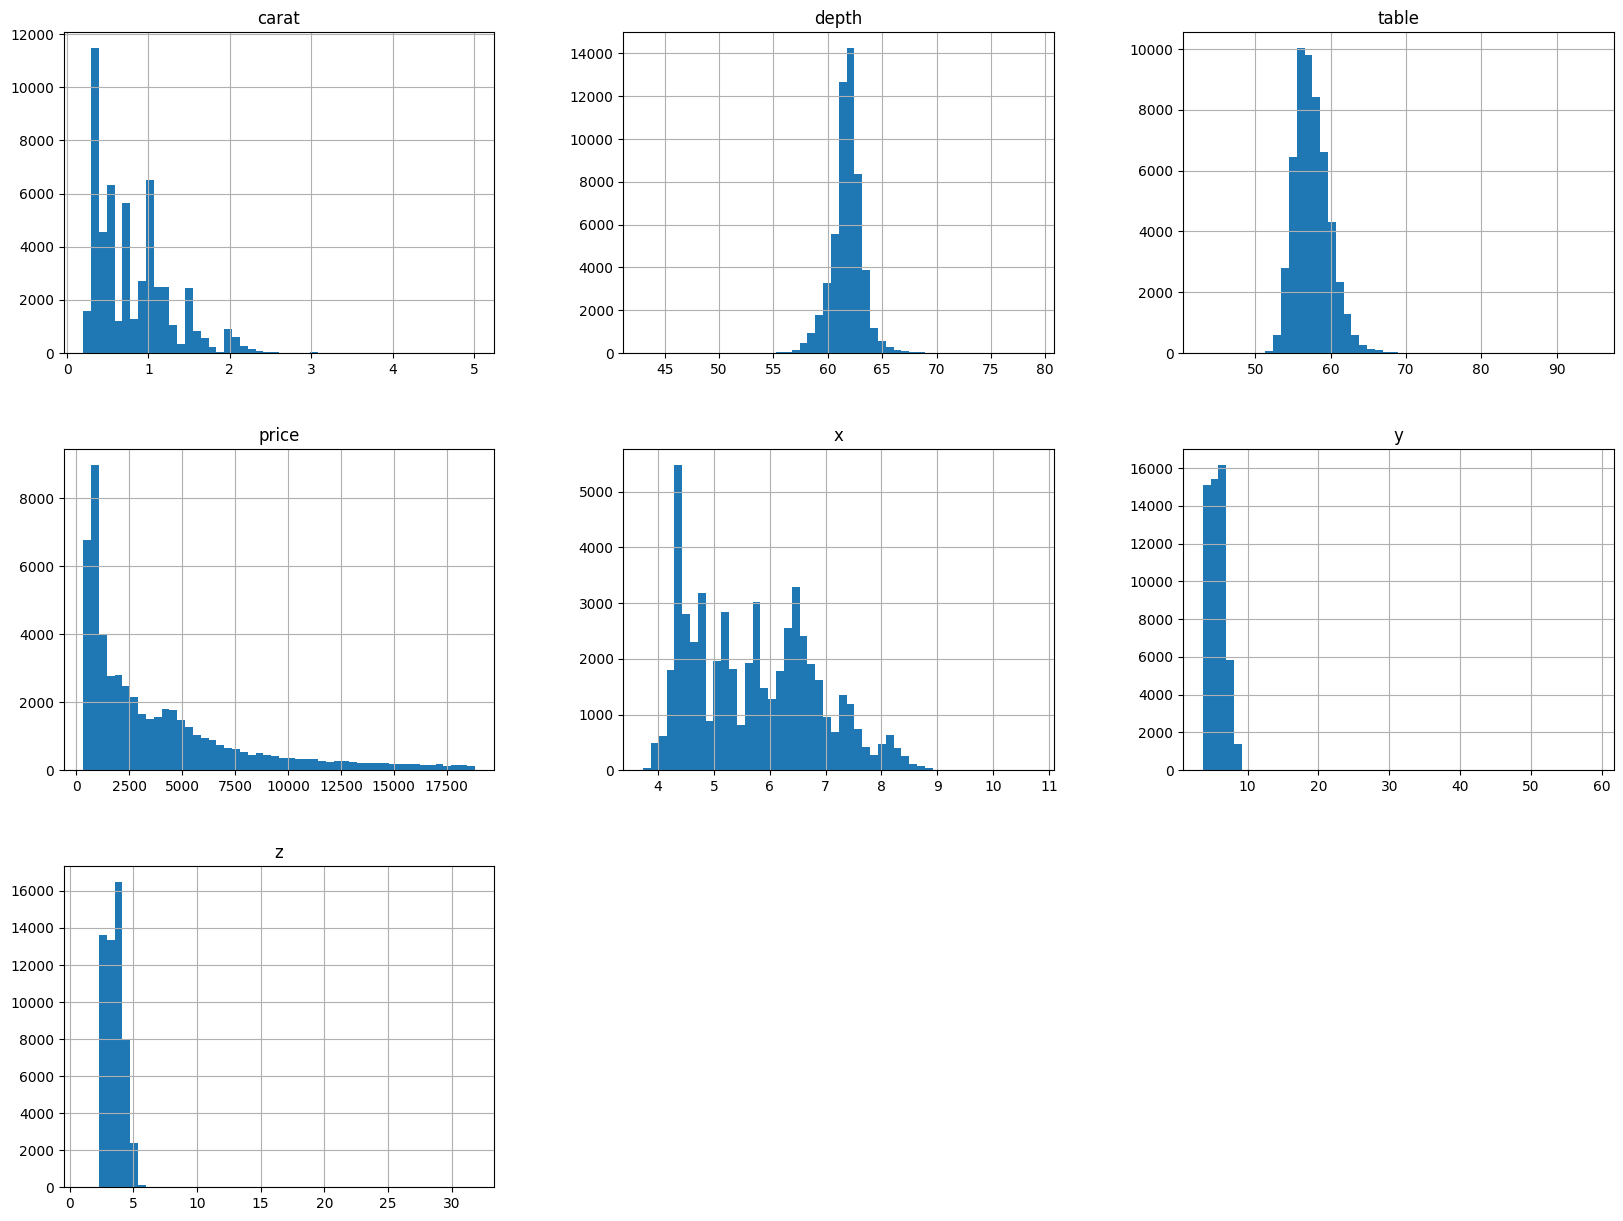

In [76]:
# Visualizing distributions of numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()

## Examining boxplots of price by categorical variables

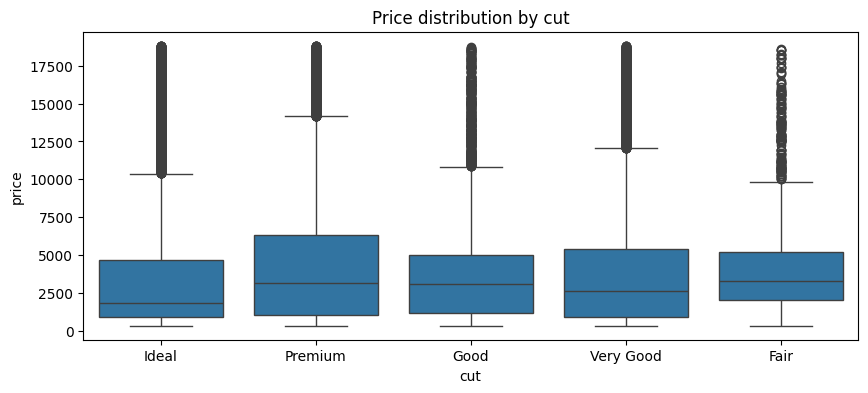

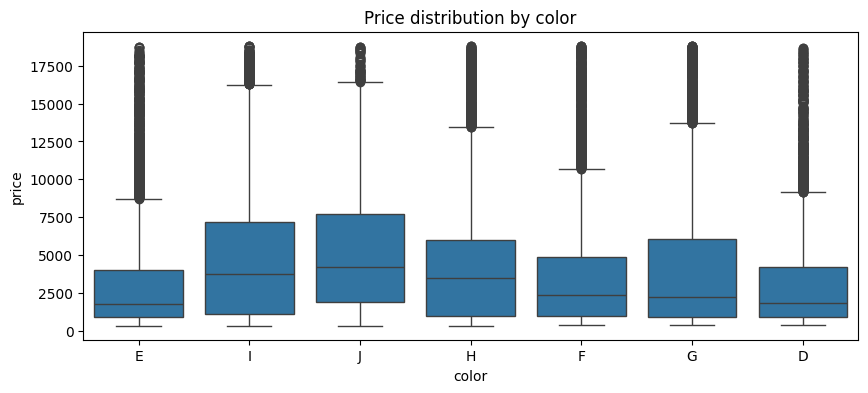

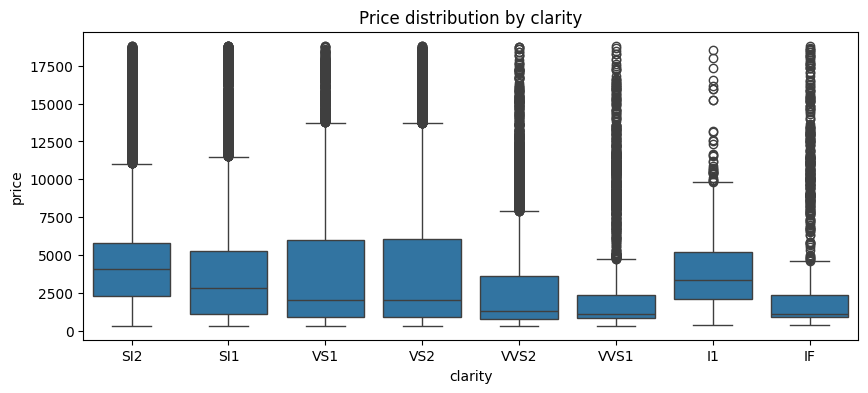

In [77]:
# Box plots for categorical variables
for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price distribution by {col}')
    plt.show()

## Examining correlation heatmaps and VIF for multicollinearity

### All numerical variables before label encoding

<ipython-input-78-e3a77db802af>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



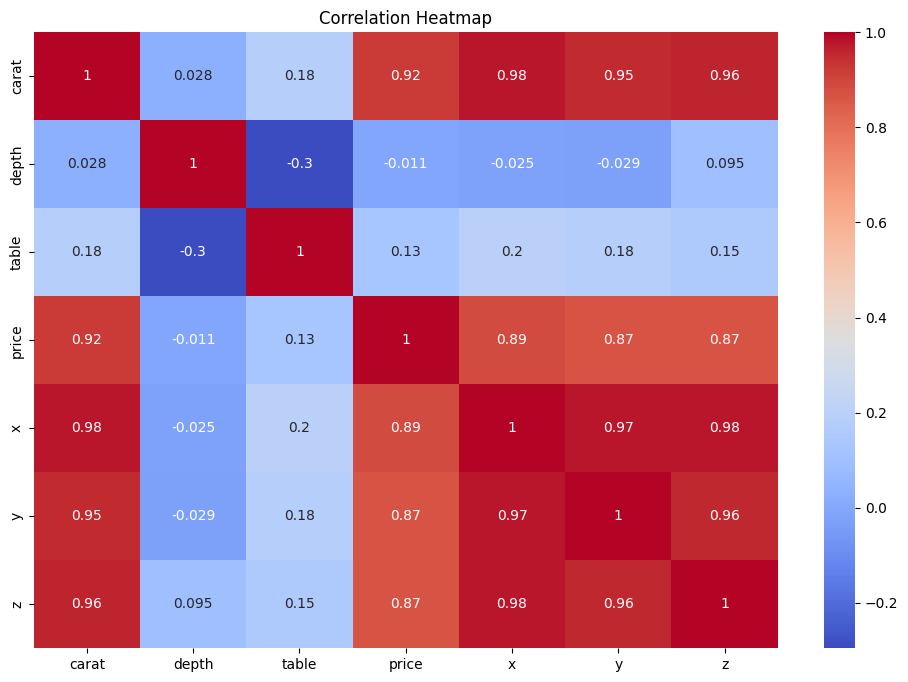

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [79]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(['price','cut', 'color', 'clarity'], axis=1).columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.drop(['price','cut', 'color', 'clarity'], axis=1).values, i)
                          for i in range(len(df.drop(['price','cut', 'color', 'clarity'], axis=1).columns))]
print(vif_data)

  feature          VIF
0   carat    78.640667
1   depth   542.999805
2   table   514.403031
3       x  1403.225662
4       y   539.183814
5       z   677.229688


### All numerical variables after label encoding

In [80]:
df_test = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df_test['cut'] = df_test['cut'].map(cut_mapper)
df_test['color'] = df_test['color'].map(color_mapper)
df_test['clarity'] = df_test['clarity'].map(clarity_mapper)

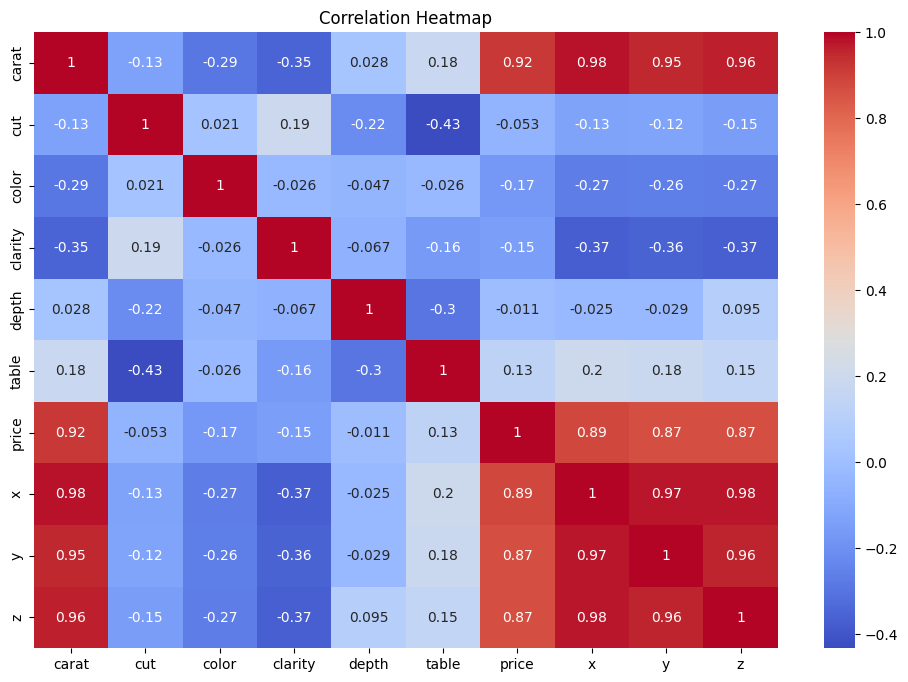

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [82]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.drop(['price'], axis=1).columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.drop(['price'], axis=1).values, i)
                          for i in range(len(df_test.drop(['price'], axis=1).columns))]
print(vif_data)

   feature          VIF
0    carat    83.566159
1      cut    15.151010
2    color     8.597516
3  clarity    17.283305
4    depth   620.402961
5    table   564.808577
6        x  1498.399556
7        y   540.329850
8        z   712.170041


### All numerical variables after label encoding and dropping x, y, and z

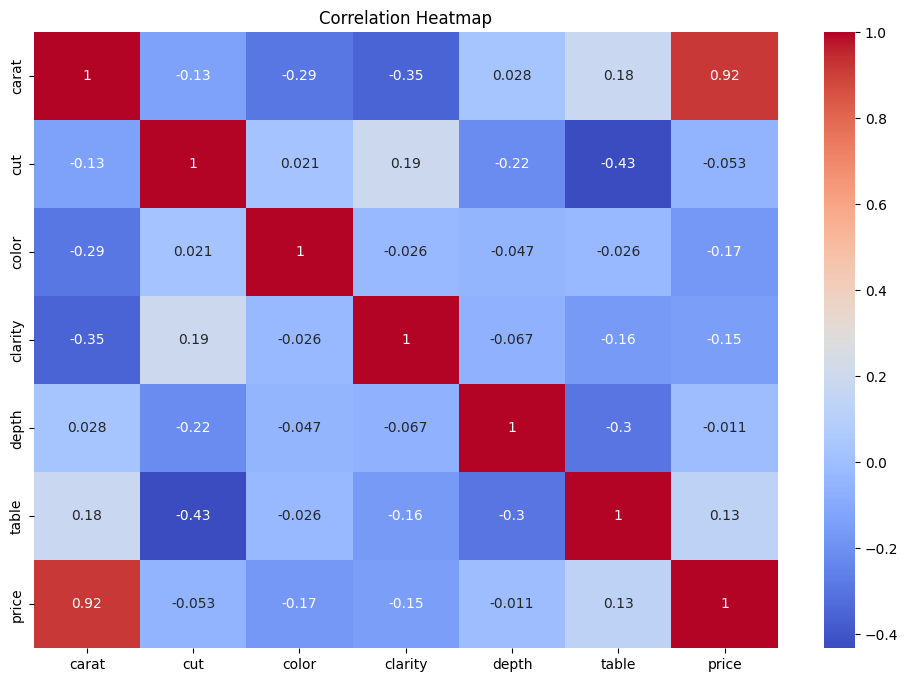

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_test.drop(['x','y','z'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [84]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.drop(['price','x','y','z'], axis=1).columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.drop(['price','x','y','z'], axis=1).values, i)
                          for i in range(len(df_test.drop(['price','x','y','z'], axis=1).columns))]
print(vif_data)

   feature         VIF
0    carat    4.975456
1      cut   13.738418
2    color    8.550758
3  clarity   17.084225
4    depth  447.078414
5    table  412.368346


### All numerical variables after label encoding and dropping depth, x, y, and z

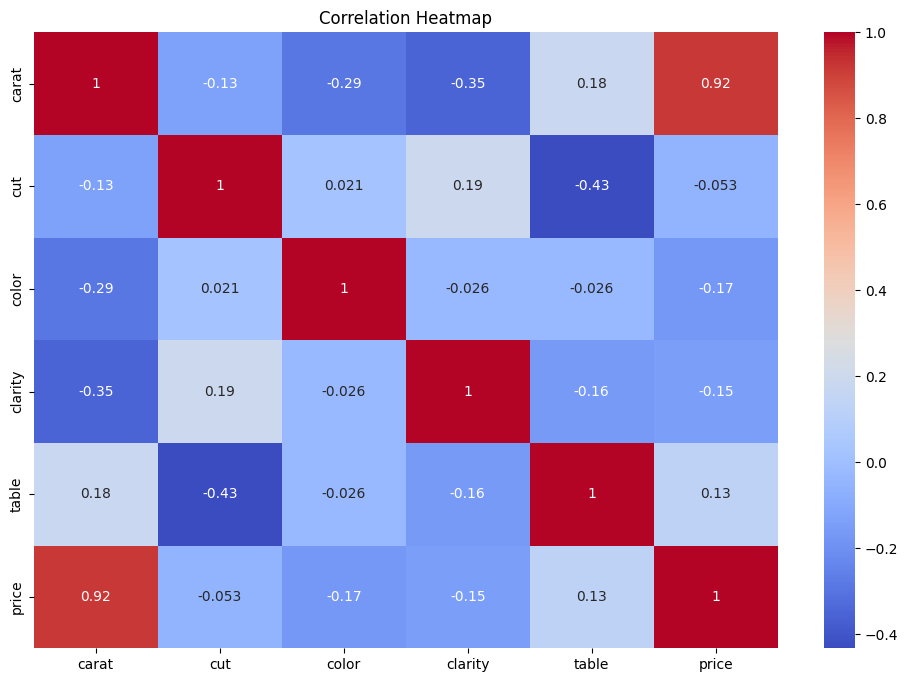

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_test.drop(['depth','x','y','z'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [86]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.drop(['price','depth','x','y','z'], axis=1).columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.drop(['price','depth','x','y','z'], axis=1).values, i)
                          for i in range(len(df_test.drop(['price','depth','x','y','z'], axis=1).columns))]
print(vif_data)

   feature        VIF
0    carat   4.967390
1      cut  12.600778
2    color   8.497572
3  clarity  16.730600
4    table  42.482928


### All numerical variables after label encoding and dropping depth, table, x, y, and z

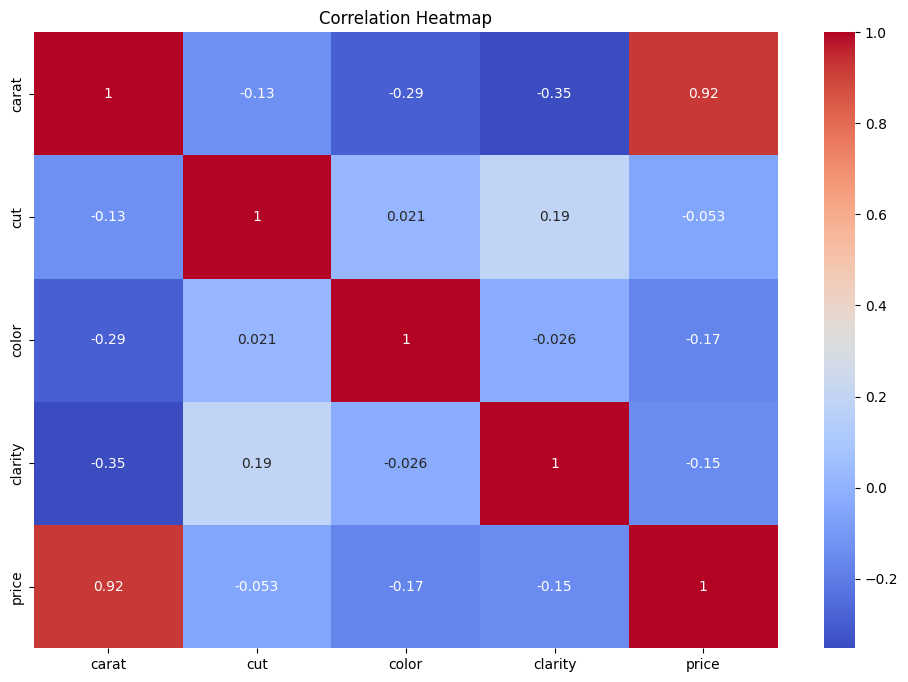

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_test.drop(['depth','table','x','y','z'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [88]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.drop(['price','depth','depth','table','x','y','z'], axis=1).columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.drop(['price','depth','depth','table','x','y','z'], axis=1).values, i)
                          for i in range(len(df_test.drop(['price','depth','depth','table','x','y','z'], axis=1).columns))]
print(vif_data)

   feature        VIF
0    carat   2.920001
1      cut  11.134557
2    color   5.946032
3  clarity  10.071442


### All numerical variables after label encoding and dropping depth, table, x, y, and z, and creating new interaction term: carat_color

In [89]:
df_test2 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df_test2['cut'] = df_test2['cut'].map(cut_mapper)
df_test2['color'] = df_test2['color'].map(color_mapper)
df_test2['clarity'] = df_test2['clarity'].map(clarity_mapper)

df_test2['carat_color'] = df_test2['carat'] * df_test2['color'].astype(float)

In [90]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_test2.drop(['price','depth','depth','table','x','y','z'], axis=1).columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test2.drop(['price','depth','depth','table','x','y','z'], axis=1).values, i)
                          for i in range(len(df_test2.drop(['price','depth','depth','table','x','y','z'], axis=1).columns))]
print(vif_data)

       feature        VIF
0        carat  12.340022
1          cut  11.968235
2        color  17.248468
3      clarity  11.876501
4  carat_color  17.510023


# Linear Models

## Linear Regression

### Variables included: carat, color, cut, clarity, price

In [91]:
df2 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df2['cut'] = df2['cut'].map(cut_mapper)
df2['color'] = df2['color'].map(color_mapper)
df2['clarity'] = df2['clarity'].map(clarity_mapper)

X = df2.drop(['price','depth','depth','table','x','y','z'], axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#y_train = np.log(y_train)

# Adding constant to X_train & X_test and log transforming CaratWeight
#X_train['carat'] = X_train['carat'].transform(log)
#X_test['carat'] = X_test['carat'].transform(log)

# Creating an interaction between Color & Carat Weight
#X_train['carat_color'] = X_train['carat'] * X_train['color'].astype(float)
#X_test['carat_color'] = X_test['carat'] * X_test['color'].astype(float)

# Create Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict using the validation or test set
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 1497346.6075882965
Root Mean Squared Error: 1223.661149006659
Mean Absolute Error: 850.1964162859024
Mean Absolute Percentage Error: 48.25040089449198


### Variables included: carat, color, cut, clarity, carat_color, price

In [92]:
df3 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df3['cut'] = df3['cut'].map(cut_mapper)
df3['color'] = df3['color'].map(color_mapper)
df3['clarity'] = df3['clarity'].map(clarity_mapper)

X = df3.drop(['price','depth','depth','table','x','y','z'], axis=1)
y = df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#y_train = np.log(y_train)

# Adding constant to X_train & X_test and log transforming CaratWeight
#X_train['carat'] = X_train['carat'].transform(log)
#X_test['carat'] = X_test['carat'].transform(log)

# Creating an interaction between Color & Carat Weight
X_train['carat_color'] = X_train['carat'] * X_train['color'].astype(float)
X_test['carat_color'] = X_test['carat'] * X_test['color'].astype(float)

# Create Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict using the validation or test set
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 1438742.0494012549
Root Mean Squared Error: 1199.4757393966977
Mean Absolute Error: 849.3815946567628
Mean Absolute Percentage Error: 48.60072967642995


## Log Linear Regression

### Variables included: carat, color, cut, clarity, price

In [93]:
df6 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df6['cut'] = df6['cut'].map(cut_mapper)
df6['color'] = df6['color'].map(color_mapper)
df6['clarity'] = df6['clarity'].map(clarity_mapper)

X = df6.drop(['price','depth','depth','table','x','y','z'], axis=1)
y = df6['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.log(y_train)

# Adding constant to X_train & X_test and log transforming CaratWeight
#X_train['carat'] = X_train['carat'].transform(log)
#X_test['carat'] = X_test['carat'].transform(log)

# Creating an interaction between Color & Carat Weight
#X_train['carat_color'] = X_train['carat'] * X_train['color'].astype(float)
#X_test['carat_color'] = X_test['carat'] * X_test['color'].astype(float)

# Create Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict using the validation or test set
y_pred = np.exp(lin_reg.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 105382230.73194711
Root Mean Squared Error: 10265.584773014498
Mean Absolute Error: 1778.832169555292
Mean Absolute Percentage Error: 32.079158064781026


### Variables included: carat, color, cut, clarity, carat_color, price

In [94]:
df7 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df7['cut'] = df7['cut'].map(cut_mapper)
df7['color'] = df7['color'].map(color_mapper)
df7['clarity'] = df7['clarity'].map(clarity_mapper)

X = df7.drop(['price','depth','depth','table','x','y','z'], axis=1)
y = df7['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.log(y_train)

# Adding constant to X_train & X_test and log transforming CaratWeight
#X_train['carat'] = X_train['carat'].transform(log)
#X_test['carat'] = X_test['carat'].transform(log)

# Creating an interaction between Color & Carat Weight
X_train['carat_color'] = X_train['carat'] * X_train['color'].astype(float)
X_test['carat_color'] = X_test['carat'] * X_test['color'].astype(float)

# Create Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict using the validation or test set
y_pred = np.exp(lin_reg.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 73817651.38136575
Root Mean Squared Error: 8591.719931501826
Mean Absolute Error: 1615.1028113386012
Mean Absolute Percentage Error: 29.484856111156272


## Log Log Regression

### Variables included: carat, color, cut, clarity, price

In [95]:
df4 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df4['cut'] = df4['cut'].map(cut_mapper)
df4['color'] = df4['color'].map(color_mapper)
df4['clarity'] = df4['clarity'].map(clarity_mapper)

X = df4.drop(['price','depth','depth','table','x','y','z'], axis=1)
y = df4['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.log(y_train)

# Adding constant to X_train & X_test and log transforming CaratWeight
X_train['carat'] = X_train['carat'].transform(log)
X_test['carat'] = X_test['carat'].transform(log)

# Creating an interaction between Color & Carat Weight
#X_train['carat_color'] = X_train['carat'] * X_train['color'].astype(float)
#X_test['carat_color'] = X_test['carat'] * X_test['color'].astype(float)

# Create Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict using the validation or test set
y_pred = np.exp(lin_reg.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 880191.0588367529
Root Mean Squared Error: 938.1849811400483
Mean Absolute Error: 467.9692738677037
Mean Absolute Percentage Error: 11.556226050768037


### Variables included: carat, color, cut, clarity, carat_color, price

In [96]:
df5 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df5['cut'] = df5['cut'].map(cut_mapper)
df5['color'] = df5['color'].map(color_mapper)
df5['clarity'] = df5['clarity'].map(clarity_mapper)

X = df5.drop(['price','depth','depth','table','x','y','z'], axis=1)
y = df5['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.log(y_train)

# Adding constant to X_train & X_test and log transforming CaratWeight
X_train['carat'] = X_train['carat'].transform(log)
X_test['carat'] = X_test['carat'].transform(log)

# Creating an interaction between Color & Carat Weight
X_train['carat_color'] = X_train['carat'] * X_train['color'].astype(float)
X_test['carat_color'] = X_test['carat'] * X_test['color'].astype(float)

# Create Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict using the validation or test set
y_pred = np.exp(lin_reg.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 862954.5797306966
Root Mean Squared Error: 928.9534863117187
Mean Absolute Error: 465.4582838012839
Mean Absolute Percentage Error: 11.548680239016909


# XGBoost Model


In [97]:
df8 = df.copy()

# Assuming you have the ordinal categories already ordered correctly
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_mapper = {category: i+1 for i, category in enumerate(cut_order)}
color_mapper = {category: i+1 for i, category in enumerate(color_order)}
clarity_mapper = {category: i+1 for i, category in enumerate(clarity_order)}

df8['cut'] = df8['cut'].map(cut_mapper)
df8['color'] = df8['color'].map(color_mapper)
df8['clarity'] = df8['clarity'].map(clarity_mapper)

X = df8.drop('price', axis=1)
y = df8['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror')

param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'alpha': [5, 10],
    'n_estimators': [50, 100]
}
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Mean Squared Error: 289281.46455310174
Root Mean Squared Error: 537.8489235399675
Mean Absolute Error: 271.4167044479094
Mean Absolute Percentage Error: 7.415178981821175


## SHAP Values Visualization

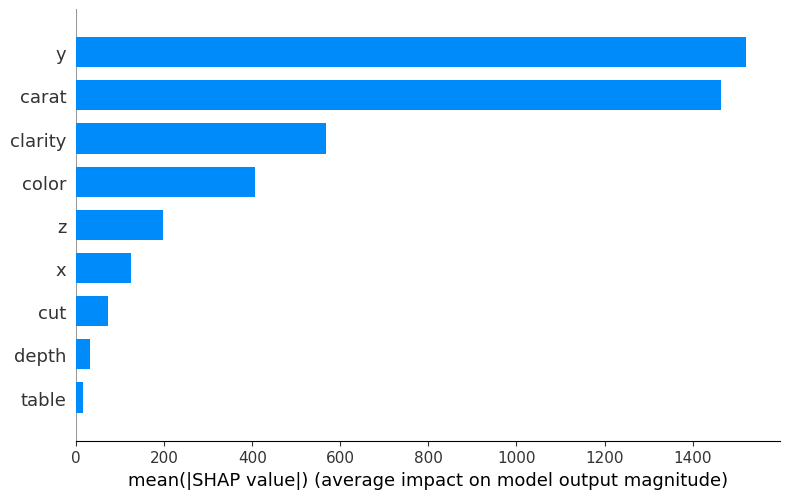

In [98]:
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="bar")